# Word2Vec

This notebook is modestly adapted from: https://github.com/kavgan/nlp-text-mining-working-examples

## Imports and logging


In [26]:
%matplotlib inline

In [28]:
# imports needed and logging
import numpy as np
import pylab as plt
from sklearn.decomposition import PCA
import gzip
import gensim 
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Imports and logging
Read in the dataset. The dataset has full user reviews of cars and hotels, where each line of the file represents a hotel review. Printing a single line of the dataser below shows a rather wordy hotel review.

In [3]:
data_file ='../inputs/reviews_data.txt.gz'

with gzip.open ('../inputs/reviews_data.txt.gz', 'rb') as f:
    for i,line in enumerate (f):
        print(line)
        break

b"Oct 12 2009 \tNice trendy hotel location not too bad.\tI stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planning on going to see the historic sites in Be

## Read files into a list
Read the file into a list so that it can be used to pass on to the Word2Vec model. 

Pre-processing of the reviews is carried out using gensim.utils.simple_preprocess. 
This does some basic pre-processing such as tokenization, lowercasing, etc and returns back a 
list of tokens (words). 
Documentation of this pre-processing method can be found on the official Gensim documentation site.

In [4]:
def  read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess (line)


In [5]:
# read the tokenized reviews into a list
# such that documents is a list of lists
documents = list (read_input (data_file))
logging.info ("Done reading data file")


2018-10-23 10:57:21,292 : INFO : reading file ../inputs/reviews_data.txt.gz...this may take a while
2018-10-23 10:57:21,294 : INFO : read 0 reviews
2018-10-23 10:57:24,241 : INFO : read 10000 reviews
2018-10-23 10:57:27,250 : INFO : read 20000 reviews
2018-10-23 10:57:31,044 : INFO : read 30000 reviews
2018-10-23 10:57:34,287 : INFO : read 40000 reviews
2018-10-23 10:57:37,942 : INFO : read 50000 reviews
2018-10-23 10:57:41,566 : INFO : read 60000 reviews
2018-10-23 10:57:44,773 : INFO : read 70000 reviews
2018-10-23 10:57:47,415 : INFO : read 80000 reviews
2018-10-23 10:57:50,307 : INFO : read 90000 reviews
2018-10-23 10:57:53,154 : INFO : read 100000 reviews
2018-10-23 10:57:55,911 : INFO : read 110000 reviews
2018-10-23 10:57:58,829 : INFO : read 120000 reviews
2018-10-23 10:58:01,856 : INFO : read 130000 reviews
2018-10-23 10:58:05,017 : INFO : read 140000 reviews
2018-10-23 10:58:07,846 : INFO : read 150000 reviews
2018-10-23 10:58:11,066 : INFO : read 160000 reviews
2018-10-23 10

In [6]:
#Show the first entry in the documents list of lists
documents[0]

['oct',
 'nice',
 'trendy',
 'hotel',
 'location',
 'not',
 'too',
 'bad',
 'stayed',
 'in',
 'this',
 'hotel',
 'for',
 'one',
 'night',
 'as',
 'this',
 'is',
 'fairly',
 'new',
 'place',
 'some',
 'of',
 'the',
 'taxi',
 'drivers',
 'did',
 'not',
 'know',
 'where',
 'it',
 'was',
 'and',
 'or',
 'did',
 'not',
 'want',
 'to',
 'drive',
 'there',
 'once',
 'have',
 'eventually',
 'arrived',
 'at',
 'the',
 'hotel',
 'was',
 'very',
 'pleasantly',
 'surprised',
 'with',
 'the',
 'decor',
 'of',
 'the',
 'lobby',
 'ground',
 'floor',
 'area',
 'it',
 'was',
 'very',
 'stylish',
 'and',
 'modern',
 'found',
 'the',
 'reception',
 'staff',
 'geeting',
 'me',
 'with',
 'aloha',
 'bit',
 'out',
 'of',
 'place',
 'but',
 'guess',
 'they',
 'are',
 'briefed',
 'to',
 'say',
 'that',
 'to',
 'keep',
 'up',
 'the',
 'coroporate',
 'image',
 'as',
 'have',
 'starwood',
 'preferred',
 'guest',
 'member',
 'was',
 'given',
 'small',
 'gift',
 'upon',
 'check',
 'in',
 'it',
 'was',
 'only',
 'co

### Training the Word2Vec model

Training the model is fairly straightforward. You just instantiate Word2Vec and pass in the documents. Where each list within the main list contains a set of tokens from a user review. Word2Vec uses all these tokens to internally create a vocabulary, which is a unique set words.

After building the vocabulary, we just need to call train(...) to start training the Word2Vec model. Training on this dataset takes about 10 minutes so please be patient. This trains a simple neural network with a single hidden layer with the goal of learning the weights of the hidden layer. These weights are essentially the word vectors that we’re trying to learn.

In [7]:
model=gensim.models.Word2Vec(documents, size=150, window=10, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=10)

2018-10-23 10:58:40,467 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2018-10-23 10:58:40,469 : INFO : collecting all words and their counts
2018-10-23 10:58:40,471 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-10-23 10:58:41,044 : INFO : PROGRESS: at sentence #10000, processed 1655714 words, keeping 25777 word types
2018-10-23 10:58:41,616 : INFO : PROGRESS: at sentence #20000, processed 3317863 words, keeping 35016 word types
2018-10-23 10:58:42,316 : INFO : PROGRESS: at sentence #30000, processed 5264072 words, keeping 47518 word types
2018-10-23 10:58:42,917 : INFO : PROGRESS: at sentence #40000, processed 7081746 words, keeping 56675 word types
2018-10-23 10:58:43,576 : INFO : PROGRESS: at sentence #50000, processed 9089491 words, keeping 63744 word types
2018-10-23 10:58:44,215 : INFO : PROGRESS: at sentence #60000, processed 11013723 words, keeping 76780 word types
2018-10-23 10:58:44,781 : INFO : PROGRESS: a

2018-10-23 10:59:36,230 : INFO : PROGRESS: at 34.01% examples, 1318535 words/s, in_qsize 18, out_qsize 1
2018-10-23 10:59:37,234 : INFO : PROGRESS: at 34.96% examples, 1319805 words/s, in_qsize 20, out_qsize 0
2018-10-23 10:59:38,240 : INFO : PROGRESS: at 35.76% examples, 1318846 words/s, in_qsize 18, out_qsize 1
2018-10-23 10:59:39,248 : INFO : PROGRESS: at 36.63% examples, 1318298 words/s, in_qsize 19, out_qsize 0
2018-10-23 10:59:40,258 : INFO : PROGRESS: at 37.48% examples, 1317101 words/s, in_qsize 17, out_qsize 2
2018-10-23 10:59:41,261 : INFO : PROGRESS: at 38.39% examples, 1316326 words/s, in_qsize 18, out_qsize 1
2018-10-23 10:59:42,270 : INFO : PROGRESS: at 39.26% examples, 1315340 words/s, in_qsize 19, out_qsize 0
2018-10-23 10:59:43,277 : INFO : PROGRESS: at 40.16% examples, 1315370 words/s, in_qsize 18, out_qsize 1
2018-10-23 10:59:44,280 : INFO : PROGRESS: at 40.98% examples, 1313688 words/s, in_qsize 19, out_qsize 0
2018-10-23 10:59:45,285 : INFO : PROGRESS: at 41.78% ex

2018-10-23 11:00:55,755 : INFO : PROGRESS: at 98.42% examples, 1257673 words/s, in_qsize 19, out_qsize 0
2018-10-23 11:00:56,758 : INFO : PROGRESS: at 99.18% examples, 1256487 words/s, in_qsize 19, out_qsize 0
2018-10-23 11:00:57,726 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-10-23 11:00:57,733 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-10-23 11:00:57,745 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-10-23 11:00:57,746 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-10-23 11:00:57,747 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-10-23 11:00:57,751 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-10-23 11:00:57,755 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-10-23 11:00:57,758 : INFO : PROGRESS: at 99.99% examples, 1255716 words/s, in_qsize 2, out_qsize 1
2018-10-23 11:00:57,759 : INFO : worker thread fi

TypeError: train() got an unexpected keyword argument 'epochs'

### Output examples


### Words similar to target 

In [8]:
w1 = "lovely"
model.wv.most_similar (positive=w1, topn=10)

2018-10-23 11:05:31,700 : INFO : precomputing L2-norms of word weight vectors


[('beautiful', 0.805040180683136),
 ('gorgeous', 0.7894525527954102),
 ('wonderful', 0.752912163734436),
 ('fabulous', 0.7523320317268372),
 ('fantastic', 0.7314372658729553),
 ('nice', 0.7262121438980103),
 ('delightful', 0.7214747667312622),
 ('fab', 0.7074022889137268),
 ('stunning', 0.6599923372268677),
 ('superb', 0.6401865482330322)]

In [9]:
w1 = ["read", "book", "novel"]
model.wv.most_similar (positive=w1, topn=10)

[('glowing', 0.5727674961090088),
 ('reading', 0.5183002352714539),
 ('ta', 0.514641284942627),
 ('tripadviser', 0.48887932300567627),
 ('booking', 0.48840874433517456),
 ('divergent', 0.48663946986198425),
 ('reviewing', 0.4851156771183014),
 ('submit', 0.47704505920410156),
 ('frommers', 0.47204506397247314),
 ('favorable', 0.46634262800216675)]

In [10]:
#### Choose a word and return the top 10 most similar but that are not like another word
w1 = ["read"]
w2 = ["book", "novel"]
model.wv.most_similar (positive=w1,negative=w2,topn=10)


[('noticed', 0.36520916223526),
 ('heard', 0.3578993082046509),
 ('commented', 0.35024142265319824),
 ('mentioned', 0.3180111050605774),
 ('despite', 0.3080020546913147),
 ('misfortune', 0.3052464723587036),
 ('disparate', 0.3038405179977417),
 ('avaiblable', 0.3023104667663574),
 ('insinuated', 0.3008701801300049),
 ('experienced', 0.3007904887199402)]

### Similarity between words

This computes the cosine similarity between the two specified words using word vectors of each.

In [11]:
# similarity between two different words
model.wv.similarity(w1="dirty",w2="smelly")

0.76028256130245975

In [12]:
# similarity between two different words
model.wv.similarity(w1="dirty",w2="clean")

0.26989221592147172

### Find the odd one out
Use Word2Vec to find odd items given a list of items.

In [13]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["cat","dog","france"])

'france'


## Training parameters

model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)

### size
The size of the dense vector to represent each token or word. It can be good to experiment with different sizes. This tutorial used 150.

### window
The maximum distance between the target word and its neighboring word. If your neighbor's position is greater than the maximum window width to the left and the right, then, some neighbors are not considered as being related to the target word. In theory, a smaller window should give you terms that are more related. If you have lots of data, then the window size should not matter too much, as long as it's reasonably sized.

### min_count
Minimium frequency count of words. The model would ignore words that do not statisfy the min_count. Extremely infrequent words are usually unimportant, so its best to get rid of those. Unless your dataset is really tiny, this does not really affect the model.

### workers
How many threads to use. 

### Test simple PCA

In [19]:
# Looking at the PCA plot of the words in the first document.
first_doc = documents[0]

In [20]:
first_vec = []
for w in first_doc:
    vec = model.wv[w]
    first_vec.append(vec)

In [24]:
first_vec = np.array(first_vec)

In [25]:
first_vec.shape

(293, 150)

### PCA plot

In [39]:
pca = PCA(n_components=2)
projected = pca.fit_transform(first_vec)
projected.shape

(293, 2)

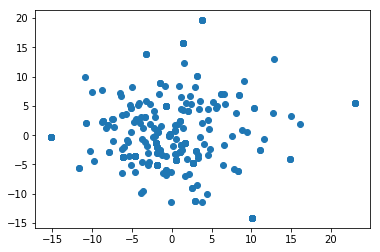

In [37]:
x = projected[:, 0]
y = projected[:, 1]
plt.scatter(x, y)
